In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-08-26 / Aki Taanila


# Tuotantolinjan simulointi

Tuotteet saapuvat käsiteltäviksi 2 minuutin välein. Saapumisen yhteydessä tuotteet tarkistetaan ja 
virheelliset hylätään ennen käsittelyn alkamista.

Jos käsittelypiste on varattu, niin tuote jää jonoon odottamaan kunnes käsittelypiste vapautuu. Käsittelyn kesto on 3 minuuttia. 

Simulointimallin avulla voidaan tutkia muodostuuko käsittelypisteestä pullonkaula. Koska 
tuotteiden saapumisväli (2 minuuttia) ja käsittelyaika (3 minuuttia) ovat vakioita, niin ainoa 
kiinnostuksen kohde on hylättävien osuus käsittelypisteeseen saapuvista tuotteista. Seuraavassa simuloidaan käsittelyn kestoaikoja eri hylkäysprosenteilla.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
TUOTTEIDEN_VÄLI = 2 #minuuttia
KÄSITTELY_AIKA = 3 #minuuttia
TOISTOJA = 10000

# Alustan satunnaislukugeneraattorin:
rng = np.random.default_rng()

In [4]:
for hylkäys_prosentti in range(40, 50, 2):
    
    tuotanto_linja = pd.DataFrame(index = range(0, TOISTOJA))
    
    tuotanto_linja['aika'] = tuotanto_linja.index * TUOTTEIDEN_VÄLI #tuotteen saapumisaika
    
    tuotanto_linja['hylätty'] = rng.binomial(1, hylkäys_prosentti/100, size=TOISTOJA)
    
    tuotanto_linja.drop(tuotanto_linja.index[tuotanto_linja['hylätty'] == 1], inplace = True) #poistetaan hylättyjen tuotteiden rivit
    tuotanto_linja.reset_index(drop=True, inplace=True) #indeksin resetointi 0, 1, 2, ...
    
    tuotanto_linja['valmis'] = tuotanto_linja['aika'] + KÄSITTELY_AIKA #käsittelyn valmistumisaika ilman jonoa
    
    #Seuraava for-silmukka lisää jonotusajan valmistumisaikaan
    #Tämän for-silmukan takia simulointi on hidas!
    for i in range(1, len(tuotanto_linja)):
        if (tuotanto_linja.loc[i, 'aika'] < tuotanto_linja.loc[i-1, 'valmis']):
            tuotanto_linja.loc[i, 'valmis'] += tuotanto_linja.loc[i-1,'valmis'] - tuotanto_linja.loc[i, 'aika']
    
    tuotanto_linja['kesto'] = tuotanto_linja['valmis'] - tuotanto_linja['aika']
    
    #Tunnuslukuja kokonaiskestosta (jonotusaika + käsittelyaika) eri hylkäysprosenteilla
    print('Hylkäysprosentti', hylkäys_prosentti)
    print(tuotanto_linja['kesto'].describe())

Hylkäysprosentti 40
count    5986.000000
mean        7.302873
std         4.596499
min         3.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        29.000000
Name: kesto, dtype: float64
Hylkäysprosentti 42
count    5868.000000
mean        6.282890
std         3.285682
min         3.000000
25%         4.000000
50%         5.000000
75%         8.000000
max        22.000000
Name: kesto, dtype: float64
Hylkäysprosentti 44
count    5579.000000
mean        5.605843
std         2.896142
min         3.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        21.000000
Name: kesto, dtype: float64
Hylkäysprosentti 46
count    5404.000000
mean        5.586788
std         3.085022
min         3.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        22.000000
Name: kesto, dtype: float64
Hylkäysprosentti 48
count    5147.000000
mean        4.737711
std         2.281063
min         3.000000
25%         3.000000
50%        

Hylkäysprosentti 33
count    6636.000000
mean       48.196203
std        34.678118
min         3.000000
25%        17.000000
50%        45.000000
75%        73.000000
max       138.000000
Name: kesto, dtype: float64


<Axes: >

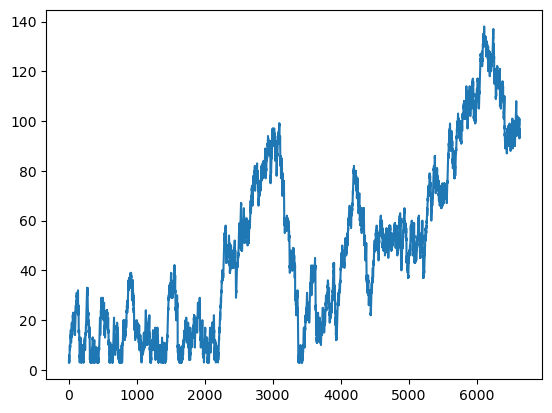

In [5]:
#Keston viivakaaviosta nähdään ovatko jonot tilapäisiä vai kasvavatko jonot ajan kuluessa

hylkäys_prosentti = 33

tuotanto_linja = pd.DataFrame(index = range(0, TOISTOJA))
    
tuotanto_linja['aika'] = tuotanto_linja.index * TUOTTEIDEN_VÄLI #tuotteen saapumisaika
    
tuotanto_linja['hylätty'] = rng.binomial(1, hylkäys_prosentti/100, size=TOISTOJA)
    
tuotanto_linja.drop(tuotanto_linja.index[tuotanto_linja['hylätty'] == 1], inplace = True) #poistetaan hylättyjen tuotteiden rivit
tuotanto_linja.reset_index(drop=True, inplace=True) #indeksin resetointi 0, 1, 2, ...
    
tuotanto_linja['valmis'] = tuotanto_linja['aika'] + KÄSITTELY_AIKA #käsittelyn valmistumisaika ilman jonoa
    
#Seuraava for-silmukka lisää jonotusajan valmistumisaikaan
#Tämän for-silmukan takia simulointi on hidas!
for i in range(1, len(tuotanto_linja)):
    if (tuotanto_linja.loc[i, 'aika'] < tuotanto_linja.loc[i-1, 'valmis']):
        tuotanto_linja.loc[i, 'valmis'] += tuotanto_linja.loc[i-1,'valmis'] - tuotanto_linja.loc[i, 'aika']
    
tuotanto_linja['kesto'] = tuotanto_linja['valmis'] - tuotanto_linja['aika']
    
print('Hylkäysprosentti', hylkäys_prosentti)
print(tuotanto_linja['kesto'].describe())
tuotanto_linja['kesto'].plot()

Lisätietoa satunnaislukujen tuottamisesta: https://numpy.org/doc/stable/reference/random/index.html